# Weather Changes Over Time (Consuming APIs)

## Task
Utilize the following two APIs to evaluate the changes in temperature for your birthday and city you were born in:
* [geocode.xyz](geocode.xyz)
* [open-meteo.com](open-meteo.com)


In [58]:
from datetime import date, datetime, timedelta

import requests
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

sns.set_palette('muted')
sns.set_style('white')

## Question 1: Geocoding A Location

Write a function that utilizes the [geocode.xyz](geocode.xyz) API to take in a city and country and return the latitude and longitude of that location

```
def geocode_location(city, country):
    # your code
    return latitude, longitude
```

For example:
```
geocode_location("london", "united kingdom")
```
should return
```
(-0.11534, 51.49742)
```

In [59]:
# write your solution here
def geocode_location(city, country):
    base_url = 'https://geocode.xyz/'
    response = requests.get(f'{base_url}', params={'locate': f'{city}, {country}', 'geoit': 'JSON'})
    body = response.json()
    longt = body['longt']
    latt = body['latt']
    return latt, longt

In [60]:
location = geocode_location('Detroit', 'United states of america')
location

('42.38833', '-83.10352')

## Question 2: Determining Weather Using Date and Location
Write a function that utilizes the [open-meteo.com](https://open-meteo.com/) API to take in a date and location and return the 15-day average high and low for the following measurements from the years 1960 to 2022:
* `precipitation_sum` (mm): Sum of daily precipitation (including rain, showers and snowfall)
* `temperature_2m_max` (°F): Maximum daily air temperature at 2 meters above ground
* `temperature_2m_min` (°F): Minimum daily air temperature at 2 meters above ground
* `apparent_temperature_max` (°F): Maximum daily apparent temperature
* `apparent_temperature_min` (°F): Min daily apparent temperature

The function should return the above measurements in a dictionary object with the keys being `"precipitation_sum"`, `"temperature_2m_max"`, etc. and the values being the 15-day average of the measurements. The 15-day average should be the 7 days preceeding the input date, the input date, and the 7 days following the input date. This will give the results more statistical validity by increasing the number of samples for each measurement.

The `get_historical_weather_measurements()` function will include a few different sub-tasks:

### Create API Request in Postman/Insomnia
Use the following [API Documentation](https://open-meteo.com/en/docs/historical-weather-api#api-documentation) page to create an API request that responds with a JSON object of the measurements listed above. Make sure the response object meets the following:
* Temperatue measurements are in Fahrenheit
* Precipitation measurements are in inches
* Measurements are daily aggregations
* 15 day range of weather
* JSON format

Before writing any code, use Postman/Insomnia to create the API request and take a screenshot of the request/response.

#### HINT: How to insert a screenshot
1. Take a screenshot and save it to a file.
2. Create a markdown cell in your notebook.
3. Insert the image into the markdown cell.
  * Option 1: Drag the image file into the markdown cell. This embeds the image data directly into your Jupyter notebook.
  * Option 2: Move the file into the directory with your notebook file (inside the project folder that you will submit). Add markdown to insert the image: `![alternative text](path-to-image)`

### Create API Request Function
Convert the request above into a function. The function should take in `latitude`, `longitude`, and `date` as its arguments and return the API response, if successful.

```
def get_api_response(latitude, longitude, date):
    # your code

```

Use the helper function below for creating a 15-day date range

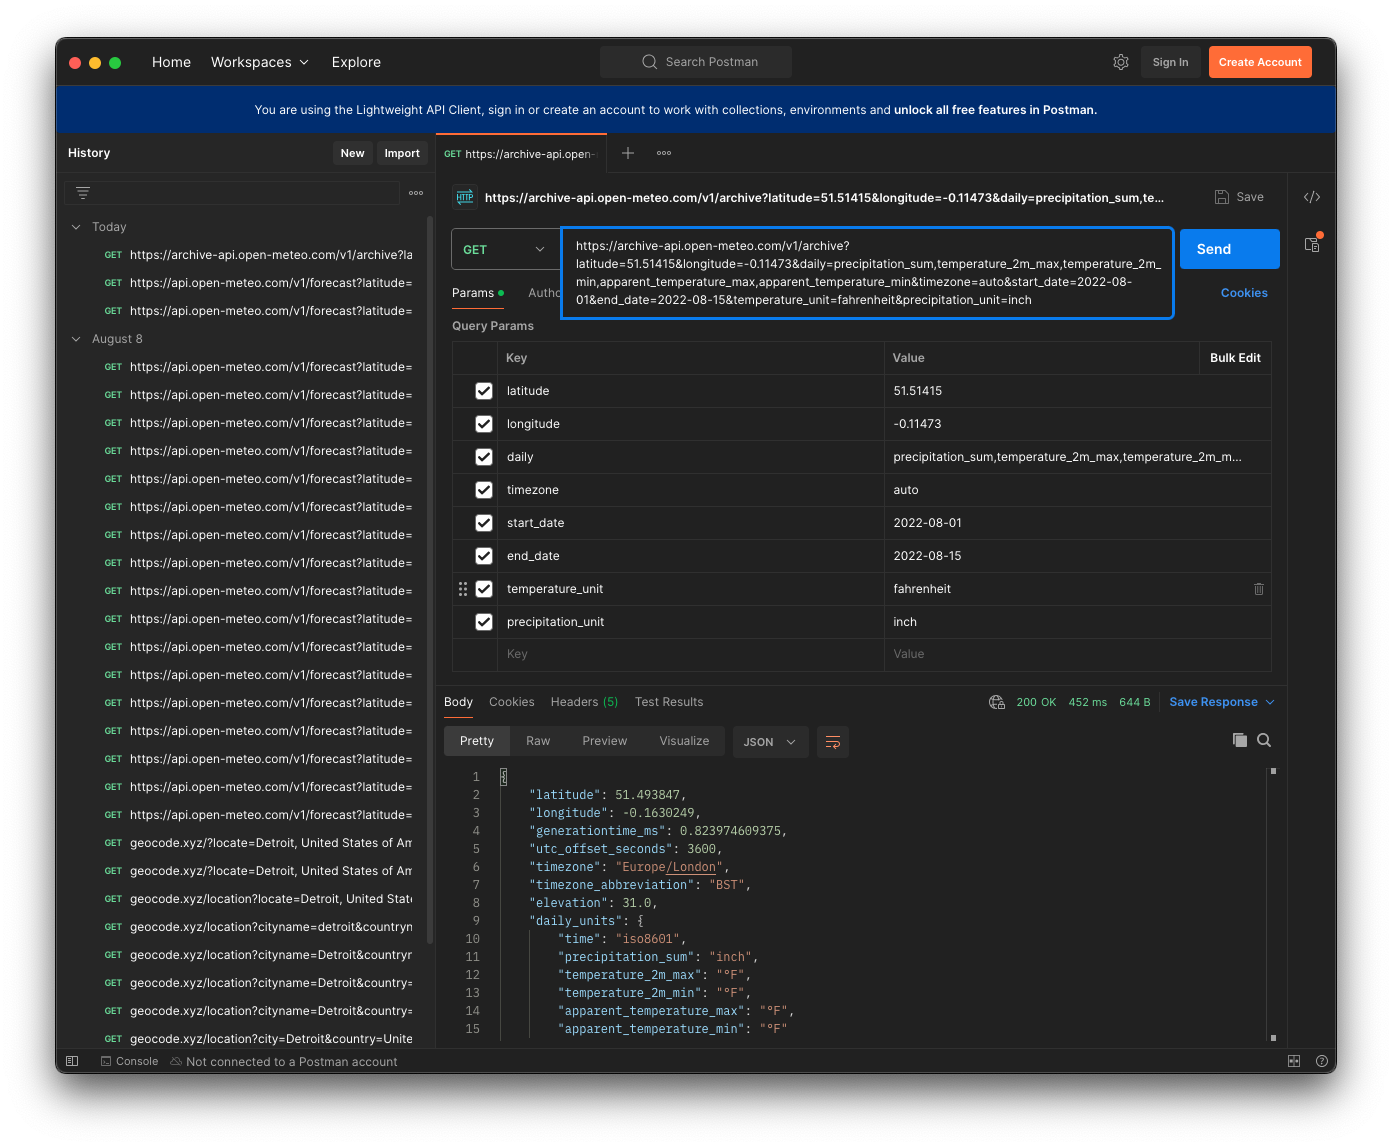

In [61]:
# helper function for 15-day date range
def get_date_range(birthday):
    return {'start_date': birthday - timedelta(days=7),
            'end_date': birthday + timedelta(days=7)
           }

In [62]:
# write your solution here
def get_api_response(latitude, longitude, date):
    date_range = get_date_range(date)
    base_url = 'https://archive-api.open-meteo.com'
    response = requests.get(
        f'{base_url}/v1/archive', 
        params={
            'latitude': latitude, 
            'longitude': longitude, 
            'daily': ('precipitation_sum','temperature_2m_max','temperature_2m_min','apparent_temperature_max','apparent_temperature_min'), 
            'timezone': 'auto', 
            'start_date': date_range['start_date'], 
            'end_date': date_range['end_date'], 
            'temperature_unit': 'fahrenheit', 
            'precipitation_unit': 'inch'})
    return response

In [65]:
body2 = get_api_response(location[0], location[1], date(1988, 10, 18)).json()
body2

{'latitude': 42.355007,
 'longitude': -83.13785,
 'generationtime_ms': 0.18906593322753906,
 'utc_offset_seconds': -14400,
 'timezone': 'America/Detroit',
 'timezone_abbreviation': 'EDT',
 'elevation': 198.0,
 'daily_units': {'time': 'iso8601',
  'precipitation_sum': 'inch',
  'temperature_2m_max': '°F',
  'temperature_2m_min': '°F',
  'apparent_temperature_max': '°F',
  'apparent_temperature_min': '°F'},
 'daily': {'time': ['1988-10-11',
   '1988-10-12',
   '1988-10-13',
   '1988-10-14',
   '1988-10-15',
   '1988-10-16',
   '1988-10-17',
   '1988-10-18',
   '1988-10-19',
   '1988-10-20',
   '1988-10-21',
   '1988-10-22',
   '1988-10-23',
   '1988-10-24',
   '1988-10-25'],
  'precipitation_sum': [0.024,
   0.0,
   0.0,
   0.0,
   0.008,
   0.433,
   0.417,
   0.776,
   0.087,
   0.0,
   0.209,
   0.024,
   0.189,
   0.083,
   0.0],
  'temperature_2m_max': [50.1,
   45.2,
   47.0,
   61.2,
   66.8,
   59.1,
   62.2,
   62.3,
   48.3,
   49.5,
   48.8,
   49.4,
   49.1,
   44.0,
   43.8]

### Iterating Over Each Year
Write a function that iterates through each year between 1960 and 2022 and returns the corresponding JSON response objects containing weather data for each year in a python list.

```
def get_all_response_objects(start_year, end_year):
    # your code
```


In [134]:
# write your solution here
def get_all_response_objects(latitude, longitude, birthday: date):
    response_objects = list()
    for i in range(1960, 2023):
        weather = get_api_response(latitude, longitude, date(i, birthday.month, birthday.day)).json()
        response_objects.append(weather)
    return response_objects

weather_range = get_all_response_objects(location[0], location[1], date(1988, 10, 18))
weather_range

[{'latitude': 42.355007,
  'longitude': -83.13785,
  'generationtime_ms': 0.24700164794921875,
  'utc_offset_seconds': -14400,
  'timezone': 'America/Detroit',
  'timezone_abbreviation': 'EDT',
  'elevation': 198.0,
  'daily_units': {'time': 'iso8601',
   'precipitation_sum': 'inch',
   'temperature_2m_max': '°F',
   'temperature_2m_min': '°F',
   'apparent_temperature_max': '°F',
   'apparent_temperature_min': '°F'},
  'daily': {'time': ['1960-10-11',
    '1960-10-12',
    '1960-10-13',
    '1960-10-14',
    '1960-10-15',
    '1960-10-16',
    '1960-10-17',
    '1960-10-18',
    '1960-10-19',
    '1960-10-20',
    '1960-10-21',
    '1960-10-22',
    '1960-10-23',
    '1960-10-24',
    '1960-10-25'],
   'precipitation_sum': [0.008,
    0.0,
    0.0,
    0.004,
    0.642,
    0.0,
    0.0,
    0.0,
    0.24,
    0.004,
    0.0,
    0.024,
    0.024,
    0.0,
    0.0],
   'temperature_2m_max': [74.2,
    67.3,
    76.3,
    77.4,
    63.7,
    63.5,
    68.4,
    57.4,
    52.2,
    48.9

### Parse JSON Responses & Aggregate Data
Write a function that takes the list of JSON response objects from the previous function in as a parameter and returns a pandas DataFrame containing the original input date, the measurements, and the average across the 15 days.
```
def parse_json_response(responses):
    # your code
```


In [135]:
import statistics as stats

In [136]:
# write your solution here
# 'precipitation_sum','temperature_2m_max','temperature_2m_min','apparent_temperature_max','apparent_temperature_min'
def parse_json_response(responses):
    df = pd.DataFrame()
    avg_list_precip = list()
    avg_list_temp_max = list()
    avg_list_temp_min = list()
    avg_list_app_max = list()
    avg_list_app_min = list()
    date_list = list()
    for i in responses:
        avg_list_precip.append(stats.mean(i['daily']['precipitation_sum']))
        avg_list_temp_max.append(stats.mean(i['daily']['temperature_2m_max']))
        avg_list_temp_min.append(stats.mean(i['daily']['temperature_2m_min']))
        avg_list_app_max.append(stats.mean(i['daily']['apparent_temperature_max']))
        avg_list_app_min.append(stats.mean(i['daily']['apparent_temperature_min']))
        date_list.append(i['daily']['time'][7])
    df['Date'] = date_list
    df['Precipitation'] = avg_list_precip
    df['Max Temperature'] = avg_list_temp_max
    df['Min Temperature'] = avg_list_temp_min
    df['Max Apparent Temperature'] = avg_list_app_max
    df['Min Apparent Temperature'] = avg_list_app_min

    return df

weather_df = parse_json_response(weather_range)
weather_df.head(10)

,Date,Precipitation,Max Temperature,Min Temperature,Max Apparent Temperature,Min Apparent Temperature
0,1960-10-18,0.063067,59.840000,45.300000,54.713333,39.480000
1,1961-10-18,0.067400,63.006667,48.233333,58.226667,42.820000
2,1962-10-18,0.087000,61.946667,46.840000,57.713333,41.313333
3,1963-10-18,0.000800,73.433333,52.460000,69.306667,49.533333
4,1964-10-18,0.020733,58.480000,38.906667,52.566667,32.960000
5,1965-10-18,0.137533,58.513333,45.420000,54.393333,39.546667
6,1966-10-18,0.069267,56.620000,43.226667,50.126667,36.233333
7,1967-10-18,0.146467,56.693333,43.060000,51.000000,37.180000
8,1968-10-18,0.034933,64.446667,49.560000,60.706667,46.206667
9,1969-10-18,0.071133,55.826667,42.860000,49.786667,35.806667


### Combining the Functions
Write a function that combines all the above functions into one, where the user inputs their birthday and location and the function returns the pandas DataFrame containing the summary of measurements.

```
def get_data():
    birthday = get_user_birthday()
    location = get_user_city_of_birth()
    # your code here
```

The helper functions below can be used for birthday and location input information:

In [137]:
# helper functions
def get_user_birthday():
    birthday = input('Enter your birthday (MM/DD/YYYY): ')
    return datetime.strptime(birthday, "%m/%d/%Y")

def get_user_city_of_birth():
    city = input('Enter the city you were born in: ')
    country = input('Enter the country you were born in: ')
    return city , country

In [140]:
# write your solution here
def get_data():
    birthday = get_user_birthday()
    city, country = get_user_city_of_birth()
    latitude, longitude = geocode_location(city, country)
    responses = get_all_response_objects(latitude, longitude, birthday)
    return parse_json_response(responses)

Run your function and set it equal to `df`:

In [141]:
df = get_data()

df.head()

Enter your birthday (MM/DD/YYYY):  10/18/1988
Enter the city you were born in:  Detroit
Enter the country you were born in:  Michigan


,Date,Precipitation,Max Temperature,Min Temperature,Max Apparent Temperature,Min Apparent Temperature
0,1960-10-18,0.033400,60.140000,45.793333,54.780000,39.573333
1,1961-10-18,0.052400,63.100000,48.786667,58.200000,42.900000
2,1962-10-18,0.078200,62.113333,47.933333,57.533333,41.820000
3,1963-10-18,0.000533,73.406667,53.226667,69.300000,50.100000
4,1964-10-18,0.026067,58.573333,39.453333,52.600000,33.406667


## Question 3: Visualizing The Data
Plot the DataFrame using `matplotlib`/`seaborn` and write a short summary of your results.

[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, ''),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, ''),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, ''),
 Text(49, 0, ''),
 Text(50, 0, ''),
 Text(51, 0, ''),
 Text(52, 0, ''),
 Text(53, 0, ''),
 Text(54, 0, ''),
 Text(55, 0, ''),
 T

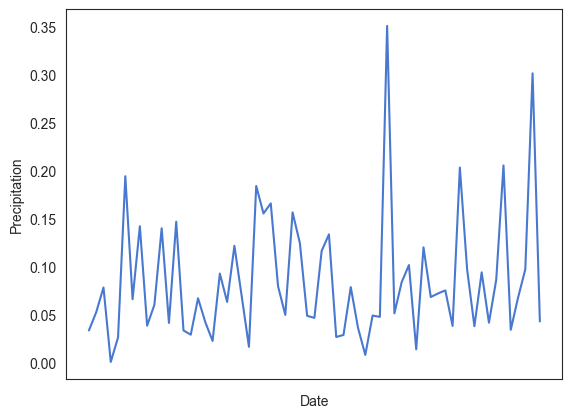

In [170]:
sns.lineplot(data=df, x='Date', y='Precipitation')
plt.gca().set_xticklabels([])

[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, ''),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, ''),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, ''),
 Text(49, 0, ''),
 Text(50, 0, ''),
 Text(51, 0, ''),
 Text(52, 0, ''),
 Text(53, 0, ''),
 Text(54, 0, ''),
 Text(55, 0, ''),
 T

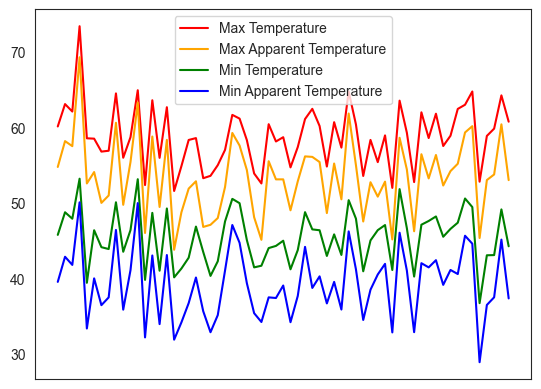

In [171]:
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Max Temperature'], label='Max Temperature', color='red')
ax.plot(df['Date'], df['Max Apparent Temperature'], label='Max Apparent Temperature', color='orange')
ax.plot(df['Date'], df['Min Temperature'], label='Min Temperature', color='green')
ax.plot(df['Date'], df['Min Apparent Temperature'], label='Min Apparent Temperature', color='blue')
ax.legend()
plt.gca().set_xticklabels([])

### Results Summary:

More extreme precipitation has happened more recently in mid to late october, but it seems the temp was a bit higher earlier in the data